# **Representation of quantum state and standard basis measurement**


---



**Importing Necessary Libraries**

---

- **Qiskit**: A popular open-source framework for quantum computing, enabling users to create quantum circuits, run simulations, and visualize results.
- **Matplotlib**: A plotting library in Python used for visualizing data.
- **NumPy**: A library for numerical operations in Python, essential for handling arrays and matrices.
- **IPython.display**: A module to display various types of output, such as mathematical expressions, in Jupyter notebooks.

In [15]:
!pip install qiskit -q

In [16]:
!pip install qiskit-aer -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 52.9 MB/s eta 0:00:00


In [66]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from math import sqrt, pi

## **1. Represent qubit state vector in matrix notation**

---

- **Quantum States**: In quantum mechanics, qubits (quantum bits) are the basic units of quantum information. They can be represented in a vector space.
- **Standard Basis States**:
  - ∣0⟩ is represented by the vector \begin{pmatrix} 1 \\ 0 \end{pmatrix}
  - ∣1⟩ is represented by the vector \begin{pmatrix} 0 \\ 1 \end{pmatrix}
- **Matrix Notation**: The above code constructs the state vectors for |0⟩ and ∣1⟩ and formats them for display in LaTeX.

In [3]:
ket_0 = np.array([[1], [0]])
ket_1 = np.array([[0], [1]])

In [6]:
ket_0_matrix = f"\\begin{{pmatrix}} {ket_0[0,0]} \\\\ {ket_0[1,0]} \\end{{pmatrix}}"
ket_1_matrix = f"\\begin{{pmatrix}} {ket_1[0,0]} \\\\ {ket_1[1,0]} \\end{{pmatrix}}"

In [7]:
display(Math(f"|0⟩ = {ket_0_matrix}"))
display(Math(f"|1⟩ = {ket_1_matrix}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## **2. Define and display state vectors and check their validity**

---

- **State Vectors**: The code defines several state vectors using the `Statevector` class from Qiskit. Each vector represents a quantum state.
- **Valid State Vectors**:
  - u, v, and w are valid state vectors
  - y,z, and a are invalid state vectors
- **Validity Check**: The `is_valid()` method checks whether the state vector is a valid quantum state, meaning its norm should equal 1.

### Mathematical Notation:
## Mathematical Notation: Validity of a State Vector

The validity of a state vector |ψ⟩ can be checked using the normalization condition:

⟨ψ|ψ⟩ = 1

Where:
- ⟨ψ| is the bra vector (the conjugate transpose of the ket vector |ψ⟩).
- |ψ⟩ is the ket vector representing the quantum state.

This condition ensures that the total probability of all possible outcomes upon measurement is equal to 1, which is a fundamental requirement for valid quantum states.


---







## **2. Define and Display State Vectors and Check Their Validity**

---

- **State Vectors**: The code defines several state vectors using the `Statevector` class from Qiskit. Each vector represents a quantum state.
- **Valid State Vectors**:
  - \( u \), \( v \), and \( w \) are valid state vectors.
- **Invalid State Vectors**:
  - \( y \), \( z \), and \( b \) are invalid state vectors.
- **Validity Check**: The `is_valid()` method checks whether the state vector is a valid quantum state, meaning its norm should equal 1.

### Mathematical Notation: Validity of a State Vector

The validity of a state vector \( |\psi\rangle \) can be checked using the normalization condition:

$$
\langle \psi | \psi \rangle = 1
$$

Where:
- $  \langle \psi |  $ is the bra vector (the conjugate transpose of the ket vector $ |\psi\rangle  $.
-  $ |\psi\rangle  $ is the ket vector representing the quantum state.

This condition ensures that the total probability of all possible outcomes upon measurement is equal to 1, which is a fundamental requirement for valid quantum states.

---


In [52]:
u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1/sqrt(10), 3/sqrt(10)])

y = Statevector([1/2, 1/2])
z = Statevector([2, 2])
b = Statevector([1, 2])

### Valid State Vector Calculation

For the valid state vector \( u \), the calculation will yield:

$$
\langle u | u \rangle = \left| \frac{1}{\sqrt{2}} \right|^2 + \left| \frac{1}{\sqrt{2}} \right|^2 = \frac{1}{2} + \frac{1}{2} = 1
$$

Since the probability is coming up to be 1, its a valid state vector.

### Invalid State Vector Calculation

For the invalid state vector \( z \), the calculation will yield:

$$
\langle z | z \rangle = |2|^2 + |2|^2 = 4 + 4 = 8
$$

Since the probability is not coming up to be 1, its not a valid state vector

In [37]:
def display_state(state, label):
    display(f"{label}: ",state.draw('latex'))
    display(f"{label} is valid: {state.is_valid()}")

**Valid State Vectors**

---

In [51]:
display_state(u, "u")
display_state(v, "v")
display_state(w, "w")

'u: '

<IPython.core.display.Latex object>

'u is valid: True'

'v: '

<IPython.core.display.Latex object>

'v is valid: True'

'w: '

<IPython.core.display.Latex object>

'w is valid: True'

**Invalid State Vectors**

---

In [42]:
display_state(y, "y")
display_state(z, "z")
display_state(b, "b")

'y: '

<IPython.core.display.Latex object>

'y is valid: False'

'z: '

<IPython.core.display.Latex object>

'z is valid: False'

'b: '

<IPython.core.display.Latex object>

'b is valid: False'

## **Simulate measurements and visualise the result**

---

- **Measurement Simulation**: The function `simulate_measurement` displays the state vector and simulates a measurement. In quantum mechanics, measuring a quantum state collapses it into one of the basis states according to the probabilities defined by the state's amplitudes.
- **Measurement Probabilities**: The probability of measuring a state is given by the square of the absolute value of its amplitude:
$$
P(|0\rangle)  =  |\alpha|^2, \quad P(|1\rangle)  = |\beta|^2 \quad \text{for } |\psi\rangle = \alpha |0\rangle + \beta |1\rangle
$$

- **Sampling and Visualization**: The `sample_counts` method is used to simulate 1000 measurements, resulting in a count of how many times each state is measured. The histogram of the measurement outcomes is then plotted using `plot_histogram`.

In [102]:
def simulate_measurement(state_vector):
  display("State Vector: ",state_vector.draw('latex'))
  print(f"Measurement: ",state_vector.measure())

## **Measurement Probabilities for State Vector \( u \)**

---

The state vector \( u \) is defined as:

$$
u = |u\rangle = \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle
$$

Where:
- The amplitude $ \alpha = \frac{1}{\sqrt{2}}  $ corresponds to the basis state $  |0\rangle $ .
- The amplitude  $\beta = \frac{1}{\sqrt{2}} $  corresponds to the basis state $ |1\rangle $ .

### Probability Calculation

The probabilities of measuring the states \( |0\rangle \) and \( |1\rangle \) can be calculated using the formula for measurement probabilities:

1. **Probability of measuring $ |0\rangle $**:

   $$
   P\left(|0\rangle\right) = |\alpha|^2
   $$
   Substituting $ \alpha $:

   $$
   P\left(|0\rangle\right) = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2}
   $$

2. **Probability of measuring $ |1\rangle $**:

   $$
   P\left(|1\rangle\right) = |\beta|^2
   $$
   Substituting $ \beta $:

   $$
   P\left(|1\rangle\right) = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2}
   $$

### Summary of Measurement Probabilities

Thus, the probabilities of measuring the state vector \( u \) are:

- Probability of measuring $ |0\rangle $:
  $$ P\left(|0\rangle\right) = \frac{1}{2} $$

- Probability of measuring $ |1\rangle $:
  $$ P\left(|1\rangle\right) = \frac{1}{2} $$

These probabilities indicate that upon measurement, there is an equal chance of collapsing the state to either $ |0\rangle $ or $ |1\rangle $.

---


In [103]:
simulate_measurement(u)

'State Vector: '

<IPython.core.display.Latex object>

Measurement:  ('1', Statevector([0.+0.j, 1.+0.j],
            dims=(2,)))


*When a measurement is made, the output is either 0 or 1. There is a probability that the measurement will be 0 and a probability that the measurement will be 1.*

In [105]:
simulate_measurement(v)

'State Vector: '

<IPython.core.display.Latex object>

Measurement:  ('1', Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,)))


In [79]:
simulate_measurement(w)

'State Vector: '

<IPython.core.display.Latex object>

Measurement:  ('1', Statevector([0.+0.j, 1.+0.j],
            dims=(2,)))


The probability of each state vector changes upon each re-run of the simulation due to the inherent randomness of quantum measurements and the probabilistic nature of quantum mechanics. Here are the key reasons why:

### 1. **Measurement in Quantum Mechanics**
- **Collapse of State**: When you measure a quantum state, it collapses to one of its basis states (e.g., $|0\rangle $ or $|1\rangle$). The outcome of this measurement is probabilistic.
- **Probability Amplitudes**: The probabilities of measuring a particular state depend on the square of the absolute value of the probability amplitudes in the state vector. For example, if your state vector is:
  $$
  |\psi\rangle = \alpha |0\rangle + \beta |1\rangle
  $$
  Then the probabilities are:
  $$ P(|0\rangle) = |\alpha|^2, \quad P(|1\rangle) = |\beta|^2 $$

### 2. **Statistical Sampling**
- **Finite Trials**: When you perform a finite number of measurements (like 1000 in your simulation), the results are statistical samples of the probabilities defined by the quantum state. The more trials you run, the more you can expect the observed probabilities to converge to the theoretical probabilities.
- **Variation in Results**: Each time you run the simulation, the specific outcomes of the measurements may vary due to random fluctuations. This is why you might see different probabilities for each run, especially with a limited number of samples.

### 3. **Quantum Superposition**
- **Superposition States**: If the state vector is in a superposition (like \(|+\rangle\)), the probabilities of measuring \(|0\rangle\) or \(|1\rangle\) are equal (if perfectly balanced). However, the actual outcomes will still vary because of the probabilistic nature of measurements.

### 4. **Measurement Basis**
- **Changing Basis**: If you were to change the basis of measurement (e.g., measure in the \(X\) or \(Y\) basis instead of the \(Z\) basis), the probabilities would change based on the representation of the state vector in that new basis.


'State Vector: '

<IPython.core.display.Latex object>

'Measurement Results for State u: '

{'0': 479, '1': 521}

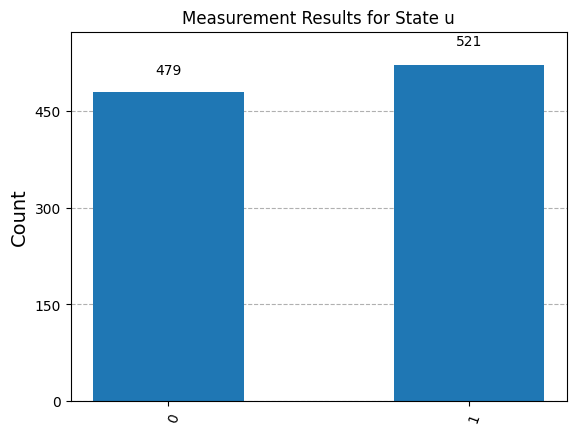

In [99]:
# Plot results for each state vector
statistics = u.sample_counts(1000)
display("State Vector: ",u.draw('latex'))
display(f"{'Measurement Results for State u'}: ",statistics)
plot_histogram(statistics, title='Measurement Results for State u')

'State Vector: '

<IPython.core.display.Latex object>

'Measurement Results for State v: '

{'0': 532, '1': 468}

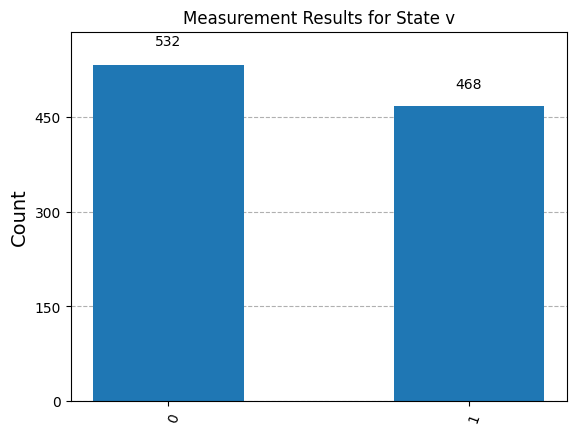

In [100]:
# Plot results for each state vector
statistics = v.sample_counts(1000)
display("State Vector: ",v.draw('latex'))
display(f"{'Measurement Results for State v'}: ",statistics)
plot_histogram(statistics, title='Measurement Results for State v')

'State Vector: '

<IPython.core.display.Latex object>

'Measurement Results for State w: '

{'0': 97, '1': 903}

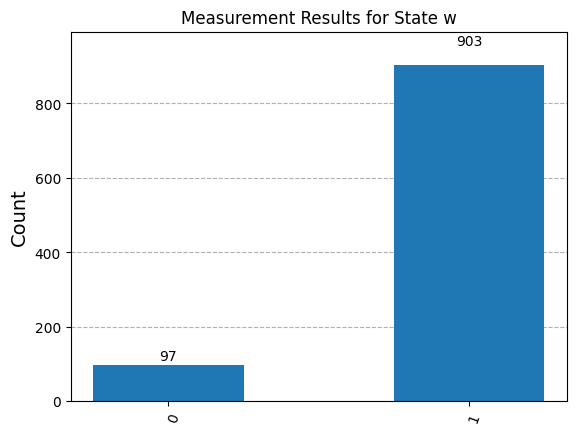

In [101]:
# Plot results for each state vector
statistics = w.sample_counts(1000)
display("State Vector: ",w.draw('latex'))
display(f"{'Measurement Results for State w'}: ",statistics)
plot_histogram(statistics, title='Measurement Results for State w')

### **Something New and Exciting**

# Dynamic Probability Visualization

This section demonstrates an interactive visualization that allows users to dynamically adjust the amplitudes of a quantum state vector and observe how these adjustments affect the measurement probabilities and resulting histograms in real time.

I used `ipywidgets` to create sliders for the amplitudes $  \alpha $ and $ \beta $, which represent the coefficients of the quantum state $ | \psi \rangle = \alpha |0\rangle + \beta |1\rangle $. The state vector is normalized based on the user inputs, and the corresponding measurement probabilities are calculated and displayed.


In [107]:
import ipywidgets as widgets
from IPython.display import display

def update_state_vector(alpha, beta):
    norm = sqrt(abs(alpha)**2 + abs(beta)**2)
    alpha_normalized = alpha / norm
    beta_normalized = beta / norm
    state_vector = Statevector([alpha_normalized, beta_normalized])
    probabilities = [abs(amplitude)**2 for amplitude in state_vector]
    plt.bar(['|0⟩', '|1⟩'], probabilities)
    plt.title(f'Probability Distribution for {state_vector.draw("latex")}')
    plt.xlabel('States')
    plt.ylabel('Probability')
    plt.ylim(0, 1)
    plt.show()
    statistics = state_vector.sample_counts(1000)
    plot_histogram(statistics, title='Measurement Results')
alpha_slider = widgets.FloatSlider(value=1, min=-2, max=2, step=0.1, description='Alpha:')
beta_slider = widgets.FloatSlider(value=1, min=-2, max=2, step=0.1, description='Beta:')
ui = widgets.VBox([alpha_slider, beta_slider])
out = widgets.interactive_output(update_state_vector, {'alpha': alpha_slider, 'beta': beta_slider})
display(ui, out)

Output()

### **Entanglement Visualization**

This section demonstrates the implementation of Bell states in quantum mechanics and simulates the measurement outcomes for each state. The four Bell states are defined, and their measurement probabilities are calculated and visualized as histograms.



To calculate the measurement probabilities for the Bell state $|\Phi^+\rangle$, we start with its mathematical representation:
$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)
$$

### Step-by-Step Calculation

1. **State Vector Representation**: The Bell state \(|\Phi^+\rangle\) can be represented as a state vector:
   $
   |\Phi^+\rangle$ = \begin{pmatrix}
   \frac{1}{\sqrt{2}} \\
   0 \\
   0 \\
   \frac{1}{\sqrt{2}}
   \end{pmatrix}
   
   Here, the vector elements correspond to the coefficients for the basis states $|00\rangle, |01\rangle, |10\rangle, and |11\rangle$, respectively.

2. **Calculating Probabilities**:
   - The probability of measuring the state \(|00\rangle\) is given by the square of the absolute value of its coefficient in the state vector:
   $$
     P(00) = |\langle 00 | \Phi^+ \rangle|^2 = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2}  
     $$
   - The probability of measuring the state \(|11\rangle\) is similarly calculated:
   $
   P(11) = |\langle 11 | \Phi^+ \rangle|^2 = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2} $

3. **Probabilities for Other States**:
   - The probabilities for the states $ |01\rangle $ and $ |10\rangle $ are:
   $ [\ P(01) = |\langle 01 | \Phi^+ \rangle|^2 = |0|^2 = 0 /],
  [\ P(10) = |\langle 10 | \Phi^+ \rangle|^2 = |0|^2 = 0 $ /]

### Summary of Results

Thus, for the Bell state $|\Phi^+\rangle$:
- $P(00) = 0.5$
- $P(01) = 0$
- $P(10) = 0$
- $P(11) = 0.5$

This means that when we measure the state $|\Phi^+\rangle$, we have a 50% chance of finding it in either $|00\rangle$ or $|11\rangle$, and a 0% chance of finding it in the states $|01\rangle$ or $|10\rangle$. This behavior is characteristic of entangled states, demonstrating that measurement outcomes are correlated between the two qubits involved.

'|Φ⁺⟩: '

<IPython.core.display.Latex object>

'|Φ⁻⟩: '

<IPython.core.display.Latex object>

'|Ψ⁺⟩: '

<IPython.core.display.Latex object>

'|Ψ⁻⟩: '

<IPython.core.display.Latex object>

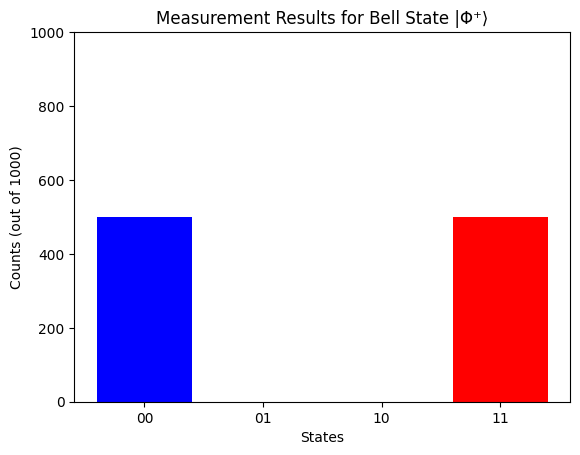

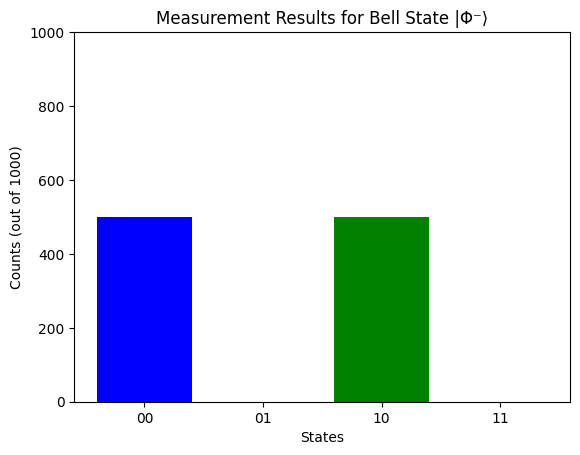

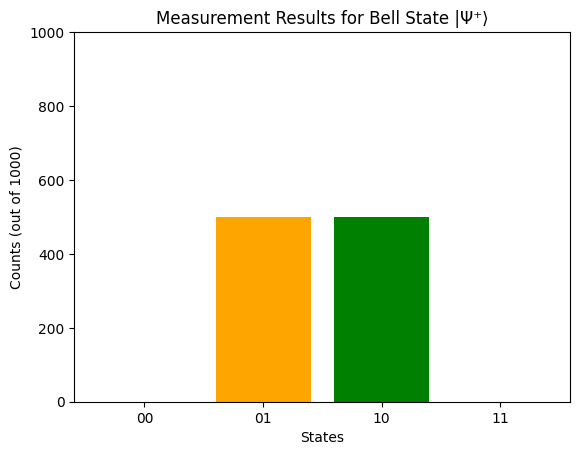

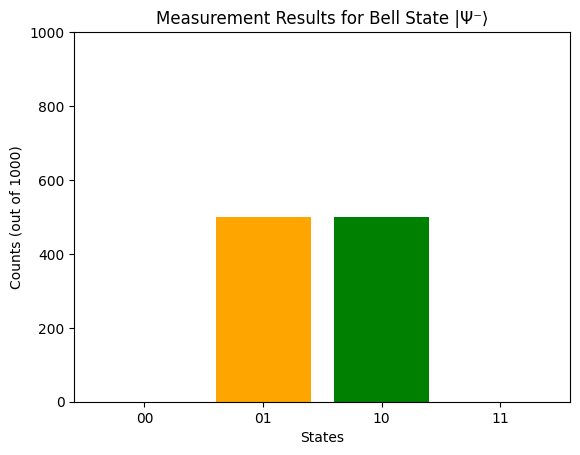

In [118]:
bell_states = {
    '|Φ⁺⟩': Statevector([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)]),
    '|Φ⁻⟩': Statevector([1/np.sqrt(2), 0, 1/np.sqrt(2), 0]),
    '|Ψ⁺⟩': Statevector([0, 1/np.sqrt(2), 1/np.sqrt(2), 0]),
    '|Ψ⁻⟩': Statevector([0, 1/np.sqrt(2), -1/np.sqrt(2), 0])
}

counts_list = []

for name, state_vector in bell_states.items():
  display(f"{name}: ",state_vector.draw('latex'))
  probabilities = np.abs(state_vector.data)**2
  counts = {
        '00': probabilities[0] * 1000,
        '01': probabilities[1] * 1000,
        '10': probabilities[2] * 1000,
        '11': probabilities[3] * 1000
    }
  counts_list.append((name, counts))

for name, counts in counts_list:
    plt.figure()
    plt.bar(counts.keys(), counts.values(), color=['blue', 'orange', 'green', 'red'])
    plt.title(f'Measurement Results for Bell State {name}')
    plt.xlabel('States')
    plt.ylabel('Counts (out of 1000)')
    plt.ylim(0, 1000)
    plt.show()

## **Inference**

---

Through the exploration of quantum state vectors and their measurements, we have gained a deeper understanding of several fundamental principles in quantum mechanics:

1. **State Representation**: We defined various quantum state vectors, both valid and invalid, using the Qiskit library. This process highlighted the importance of ensuring that state vectors are normalized, which is a prerequisite for their validity. The normalization condition $ \langle \psi |  \psi \rangle = 1 $ confirms that the total probability of measuring all possible outcomes must equal one.

2. **Measurement Simulation**: By simulating measurements of state vectors, we observed how quantum states collapse into one of the basis states upon measurement. This simulation emphasized the inherent uncertainty in quantum mechanics, as the outcome of a measurement cannot be predicted with certainty but only characterized by probabilities derived from the state's amplitudes.

3. **Probability Calculation**: We calculated the probabilities of measuring specific states using the square of the absolute values of the amplitudes. For the valid state vector \( u \), the equal probabilities $  P(|0\rangle) = \frac{1}{2}$  and $ P(|1\rangle) = \frac{1}{2}$  demonstrated a balanced superposition. This behavior is indicative of many quantum systems in an unmeasured state, where they can exist in multiple states simultaneously.

4. **Statistical Analysis**: Utilizing the `sample_counts` method, we simulated 1000 measurements, allowing us to visualize the results through histograms. This statistical approach provided insights into the distribution of measurement outcomes, reinforcing the probabilistic nature of quantum mechanics.

5. **Valid and Invalid State Vectors**: The distinction between valid and invalid state vectors was crucial in understanding the requirements for a proper quantum state. Invalid state vectors, such as \( z \) and \( b \), illustrated the need for normalization and underscored the potential pitfalls in defining quantum states.

6. **Quantum Mechanics Principles**: Throughout our exploration, we touched upon key principles of quantum mechanics, including superposition, measurement, and the role of probability in determining measurement outcomes. These principles form the foundation of quantum theory and have profound implications for quantum computing and information processing.


---
